# PulangPegi
Anan Agrani <br>
Augita Dewabrata <br>
Aulia Gita Pratiwi <br>
Dhyana Rara Ayu Gandini <br>
Fitrah Alamsyah <br>
Khalid Atthariq Wiraguna Aseran <br>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats

rcParams['figure.figsize'] = 20, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load Dataset

In [2]:
df_sumber = pd.read_csv ('hotel_booking1.csv')
pd.set_option('display.max_columns', None) #show all column
df_sumber.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
82738,City Hotel,0,0,2016,January,2,5,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,85.00,0,0,Check-Out,2016-01-06,Charles Tran,Charles_Tran20@hotmail.com,630-847-7429,************2160
67792,City Hotel,1,245,2017,May,19,7,2,2,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,117.00,0,2,Canceled,2016-09-07,Cindy Armstrong,Cindy.A@verizon.com,409-770-8827,************7877
39455,Resort Hotel,0,96,2017,August,32,12,2,5,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,15.0,NaN,0,Transient-Party,217.10,0,0,Check-Out,2017-08-19,Olivia Cox,Olivia.C51@comcast.net,454-727-2512,************5941
89983,City Hotel,0,102,2016,June,24,5,1,0,2,0.0,0,BB,ISR,Groups,TA/TO,0,0,1,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,65.00,0,1,Check-Out,2016-06-06,Elizabeth Bradley,EBradley82@zoho.com,197-188-3039,************7517
13093,Resort Hotel,1,125,2017,July,31,31,1,3,2,1.0,0,BB,MAR,Online TA,TA/TO,0,0,0,H,H,0,No Deposit,240.0,NaN,0,Transient,299.00,0,1,Canceled,2017-03-28,Jeremiah Daniels,Jeremiah_D@aol.com,145-605-7609,************7412
7789,Resort Hotel,1,164,2016,August,35,26,2,6,2,2.0,0,BB,ROU,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,NaN,0,Transient,232.25,0,0,Canceled,2016-03-22,Maria Burns,Maria_Burns@mail.com,833-576-7442,************8743
95542,City Hotel,0,88,2016,August,34,19,0,1,3,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,150.30,0,1,Check-Out,2016-08-20,Brandon Moore,Brandon.M@aol.com,462-114-2602,************4266
102648,City Hotel,0,3,2016,December,49,1,0,3,3,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,156.33,0,2,Check-Out,2016-12-04,Mark Gonzales,Gonzales.Mark77@yahoo.com,716-361-2423,************2709
56831,City Hotel,1,433,2016,September,38,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.00,0,0,Canceled,2015-10-21,Amanda Stewart,Amanda_S@gmail.com,255-188-1411,************1602
113582,City Hotel,0,15,2017,June,23,7,0,2,1,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,484.0,NaN,0,Transient-Party,130.00,0,0,Check-Out,2017-06-09,Patricia Mitchell,Mitchell.Patricia25@yahoo.com,597-291-6076,************8558


# Missing Value

In [3]:
# Percentage dari missing Value

percent_missing = df_sumber.isnull().sum() * 100 / len(df_sumber)
missing_value_df = pd.DataFrame({'column_name': df_sumber.columns,
                                 ' total_missing' : df_sumber.isnull().sum(),
                                 'percent_missing': round(percent_missing,3)})
missing_value_df 

,column_name,total_missing,percent_missing
hotel,hotel,0,0.000
is_canceled,is_canceled,0,0.000
lead_time,lead_time,0,0.000
arrival_date_year,arrival_date_year,0,0.000
arrival_date_month,arrival_date_month,0,0.000
arrival_date_week_number,arrival_date_week_number,0,0.000
arrival_date_day_of_month,arrival_date_day_of_month,0,0.000
stays_in_weekend_nights,stays_in_weekend_nights,0,0.000
stays_in_week_nights,stays_in_week_nights,0,0.000
adults,adults,0,0.000


Jadi ada 4 kolom yang memiliki missing value atau nilai kosong yaitu :<br>
1. `Children` : 4 baris atau 0.003%
2. `Country` : 488 baris atau  0.409%
3. `Agent` : 16.340 baris atau  13.686 %
4. `Company` : 112.593 baris atau 94.307%

In [4]:
# Fill Missing Value

df_sumber['children'].fillna(df_sumber['children'].mode()[0], inplace=True)
df_sumber['country'].fillna(df_sumber['country'].mode()[0], inplace=True)
df_sumber['agent'] = df_sumber['agent'].fillna(0)
df_sumber['company'] = df_sumber['company'].fillna(0)

In [5]:
percent_missing = df_sumber.isnull().sum() * 100 / len(df_sumber)
missing_value_df = pd.DataFrame({'column_name': df_sumber.columns,
                                 ' total_missing' : df_sumber.isnull().sum(),
                                 'percent_missing': round(percent_missing,3)})
missing_value_df 

,column_name,total_missing,percent_missing
hotel,hotel,0,0.0
is_canceled,is_canceled,0,0.0
lead_time,lead_time,0,0.0
arrival_date_year,arrival_date_year,0,0.0
arrival_date_month,arrival_date_month,0,0.0
arrival_date_week_number,arrival_date_week_number,0,0.0
arrival_date_day_of_month,arrival_date_day_of_month,0,0.0
stays_in_weekend_nights,stays_in_weekend_nights,0,0.0
stays_in_week_nights,stays_in_week_nights,0,0.0
adults,adults,0,0.0


Berikut adalah strategi kita mengatasi missing values pada setiap kolom.

* `children` : impute dengan nilai modus (0)
* `country` : impute dengan nilai modus (PRT)
* `agent` & `company` : missing value diganti menjadi 0 agar bisa dimaksimalkan saat feature engineering

# Duplicated Data

In [6]:
df_sumber.duplicated().sum()

0

Dalam dataset ini tidak ada duplicated data

# Pengelompokkan Kolom

In [7]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['hotel','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type',
        'deposit_type','customer_type','reservation_status']
boolean = ['is_canceled','is_repeated_guest']
nums = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','agent',
        'days_in_waiting_list','adr','total_of_special_requests','previous_cancellations','previous_bookings_not_canceled',
        'booking_changes','required_car_parking_spaces','company']
timestamp = ['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month',
             'reservation_status_date']

# Outliers

In [8]:
df = df_sumber

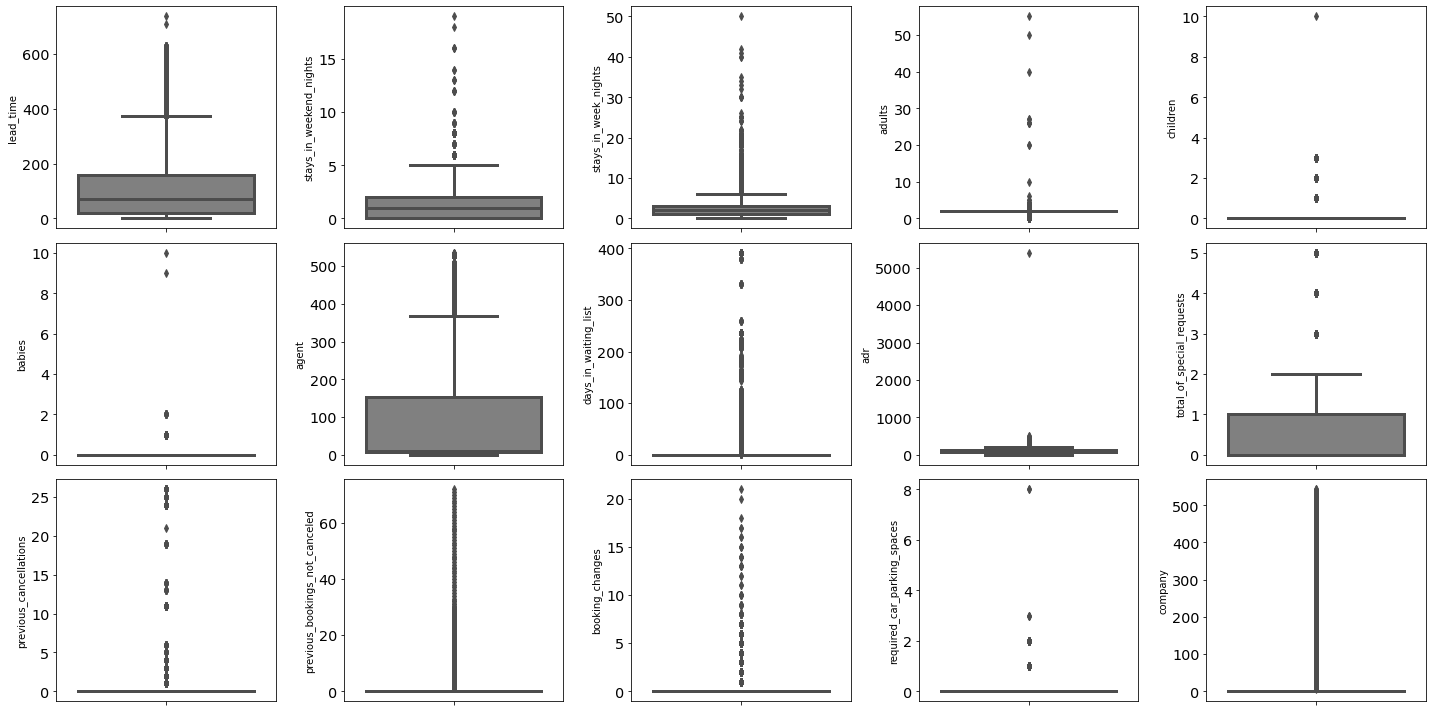

In [9]:
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Outlier tidak di-handle karena akan fokus menggunakan model yang robust terhadap outlier

# Feature Transformation

C:\Users\agran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\agran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\agran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

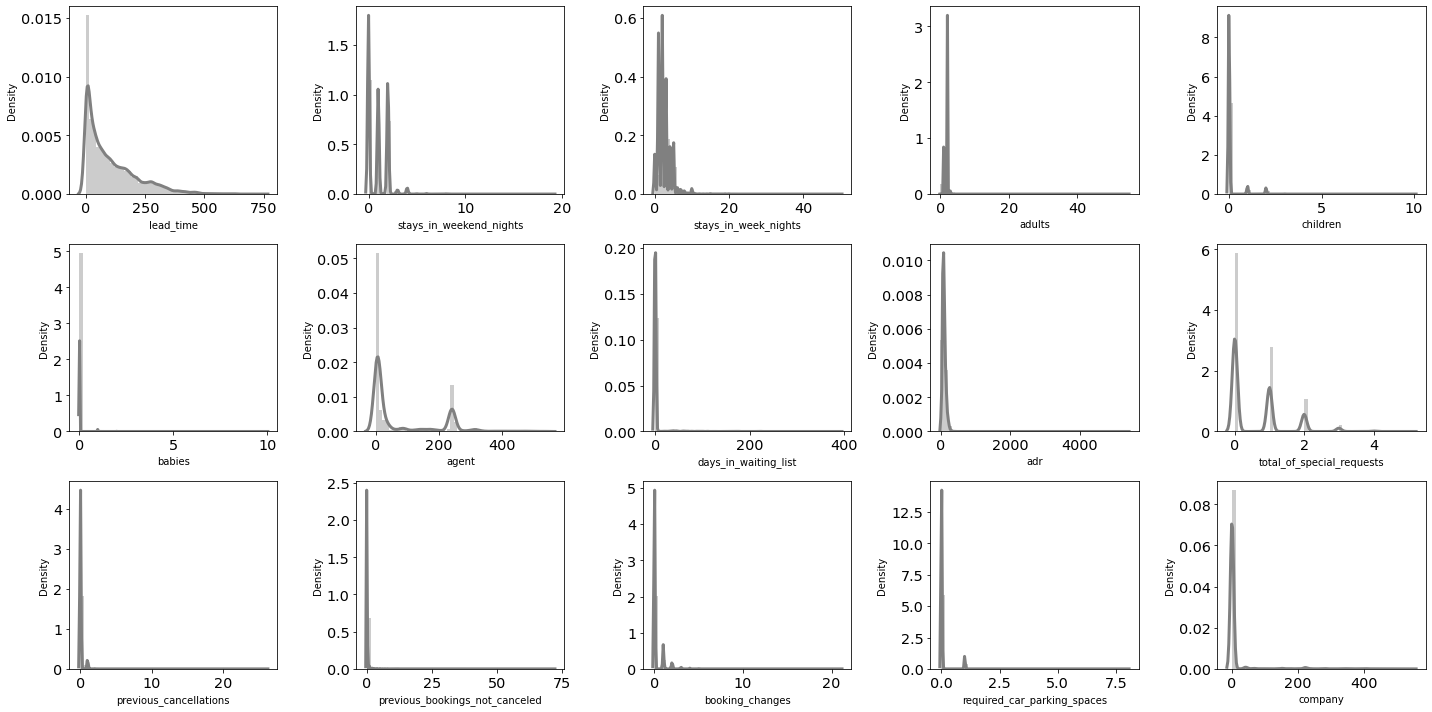

In [19]:
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)   # (baris, kolom, posisi)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

C:\Users\agran\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\agran\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\agran\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\agran\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\agran\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\agran\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in l

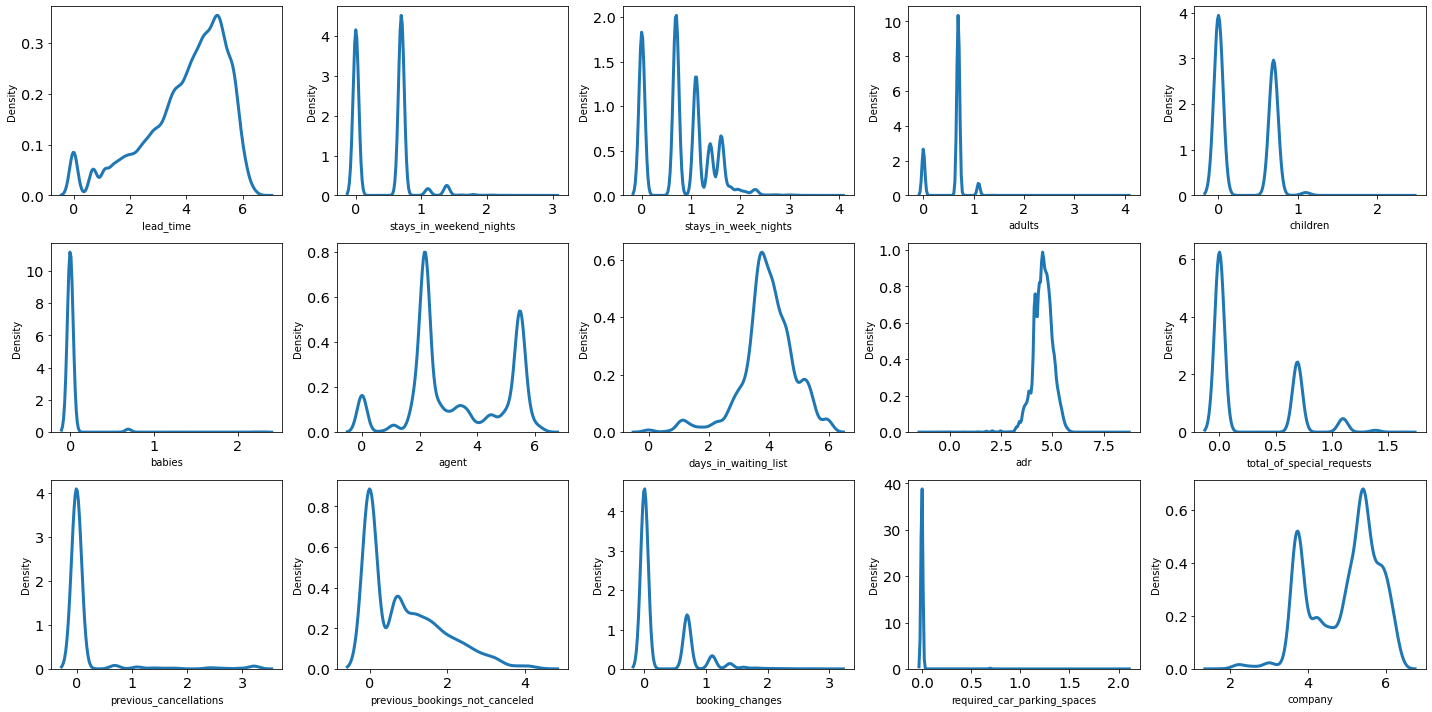

In [21]:
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)   # (baris, kolom, posisi)
    sns.kdeplot(np.log(df[nums[i]]))
    plt.tight_layout()

In [23]:
df[nums].describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,agent,days_in_waiting_list,adr,total_of_special_requests,previous_cancellations,previous_bookings_not_canceled,booking_changes,required_car_parking_spaces,company
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,0.927599,2.500302,1.856403,0.103886,0.007949,74.828319,2.321149,101.831122,0.571363,0.087118,0.137097,0.221124,0.062518,10.775157
std,106.863097,0.998613,1.908286,0.579261,0.398555,0.097436,107.141953,17.594721,50.535790,0.792798,0.844336,1.497437,0.652306,0.245291,53.943884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,152.000000,0.000000,126.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,535.000000,391.000000,5400.000000,5.000000,26.000000,72.000000,21.000000,8.000000,543.000000


# Feature Extraction

In [24]:
#fitur country, local & international 

country_type = []

for index, kolom in df.iterrows():
    country = kolom['country']

    if country == 'PRT':
        result = 'local'
    else:
        result = 'international'
        
    country_type.append(result)
    
df['country_type'] = country_type

pd.set_option('display.max_columns', None)
df[7: 14]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0.0,0,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,local
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,local
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0.0,0,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,local
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,123.00,0,0,Canceled,2015-06-23,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,local
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0.0,0,Transient,145.00,0,0,Check-Out,2015-07-05,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,local
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,0.0,0,Transient,97.00,0,3,Check-Out,2015-07-05,Casey Thomas,Casey_T78@outlook.com,211-071-2173,************8518,international
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,241.0,0.0,0,Transient,154.77,0,1,Check-Out,2015-07-05,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,international


In [25]:
#fitur match reserved room type

match_reserved_room_type = []

for index, kolom in df.iterrows():
    reserved_room_type = kolom['reserved_room_type']
    assigned_room_type = kolom['assigned_room_type']

    if reserved_room_type == assigned_room_type:
        result = 1 #artinya room nya match dgn apa yg dia book/reserve
    else:
        result = 0
    match_reserved_room_type.append(result)
    
df['match_reserved_room_type'] = match_reserved_room_type

pd.set_option('display.max_columns', None)
df[7: 14]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type,match_reserved_room_type
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0.0,0,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,local,1
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,local,1
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0.0,0,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,local,1
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,123.00,0,0,Canceled,2015-06-23,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,local,1
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0.0,0,Transient,145.00,0,0,Check-Out,2015-07-05,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,local,1
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,0.0,0,Transient,97.00,0,3,Check-Out,2015-07-05,Casey Thomas,Casey_T78@outlook.com,211-071-2173,************8518,international,0
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,241.0,0.0,0,Transient,154.77,0,1,Check-Out,2015-07-05,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,international,1


In [26]:
#fitur total_guest

total_guest = (df['adults']+df['babies']+df['children'])
    
df['total_guest'] = total_guest

pd.set_option('display.max_columns', None)
df[7: 14]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type,match_reserved_room_type,total_guest
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0.0,0,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,local,1,2.0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,local,1,2.0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0.0,0,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,local,1,2.0
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,123.00,0,0,Canceled,2015-06-23,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,local,1,2.0
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0.0,0,Transient,145.00,0,0,Check-Out,2015-07-05,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,local,1,2.0
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,0.0,0,Transient,97.00,0,3,Check-Out,2015-07-05,Casey Thomas,Casey_T78@outlook.com,211-071-2173,************8518,international,0,2.0
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,241.0,0.0,0,Transient,154.77,0,1,Check-Out,2015-07-05,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,international,1,3.0


In [27]:
# fitur total stay (gabungin weekend night, week night)

total_stay = (df['stays_in_weekend_nights']+df['stays_in_week_nights'])
    
df['total_stay'] = total_stay

pd.set_option('display.max_columns', None)
df[7: 14]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type,match_reserved_room_type,total_guest,total_stay
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0.0,0,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,local,1,2.0,2
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,local,1,2.0,3
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0.0,0,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,local,1,2.0,3
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,123.00,0,0,Canceled,2015-06-23,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,local,1,2.0,4
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0.0,0,Transient,145.00,0,0,Check-Out,2015-07-05,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,local,1,2.0,4
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,0.0,0,Transient,97.00,0,3,Check-Out,2015-07-05,Casey Thomas,Casey_T78@outlook.com,211-071-2173,************8518,international,0,2.0,4
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,241.0,0.0,0,Transient,154.77,0,1,Check-Out,2015-07-05,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,international,1,3.0,4


In [28]:
# fitur book_type from agent company

book_type = []

for index, kolom in df.iterrows():
    agent = kolom['agent']
    company = kolom['company']

    if agent > 0:
        result = 'third party'
    elif company > 0 :
        result = 'third_party'
    else:
        result = 'self-booking'
    book_type.append(result)
    
df['book_type'] = book_type

pd.set_option('display.max_columns', None)
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type,match_reserved_room_type,total_guest,total_stay,book_type
84542,City Hotel,0,1,2016,February,9,25,0,3,0,2.0,0,BB,ESP,Online TA,TA/TO,0,0,0,B,B,1,No Deposit,9.0,0.0,0,Transient-Party,71.00,0,0,Check-Out,2016-02-28,Justin Harris,Justin_Harris38@zoho.com,506-198-0339,************5321,international,1,2.0,3,third party
40911,City Hotel,0,1,2015,August,32,8,2,5,1,0.0,0,BB,POL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Contract,88.00,0,2,Check-Out,2015-08-15,Aaron Pruitt,Pruitt.Aaron@outlook.com,360-127-5066,************3816,international,1,1.0,7,third party
2450,Resort Hotel,0,130,2015,October,42,16,0,2,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,F,E,0,No Deposit,241.0,0.0,0,Transient,98.40,1,0,Check-Out,2015-10-18,Nancy Thomas,Nancy.Thomas80@yahoo.com,597-387-5371,************5658,international,0,2.0,2,third party
23265,Resort Hotel,0,32,2016,April,17,19,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,F,0,No Deposit,0.0,397.0,0,Transient-Party,59.00,0,1,Check-Out,2016-04-20,Katherine Brady,Brady_Katherine@hotmail.com,868-590-2021,************7284,local,0,2.0,1,third_party
55977,City Hotel,1,279,2016,August,35,25,2,5,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Contract,80.75,0,1,No-Show,2016-08-25,Vanessa Shields,VShields@zoho.com,520-982-7719,************3478,local,1,2.0,7,third party
104386,City Hotel,0,74,2017,January,1,7,2,3,2,1.0,0,BB,USA,Groups,TA/TO,0,0,0,D,D,4,No Deposit,330.0,0.0,0,Transient-Party,108.00,0,3,Check-Out,2017-01-12,Darlene Barnett,Darlene.Barnett@zoho.com,938-251-8660,************8787,international,1,3.0,5,third party
94492,City Hotel,0,118,2016,August,32,2,0,3,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,A,0,No Deposit,9.0,0.0,0,Transient,118.80,0,1,Check-Out,2016-08-05,Karen Strickland,Karen.S@att.com,191-506-6864,************2124,international,0,2.0,3,third party
7878,Resort Hotel,0,327,2016,August,36,31,4,10,2,0.0,0,HB,IRL,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,0.0,0.0,0,Transient,117.48,0,2,Check-Out,2016-09-14,Kelli Wood,Kelli.W@outlook.com,452-393-8416,************1386,international,1,2.0,14,self-booking
65183,City Hotel,1,73,2017,March,13,26,2,5,2,2.0,0,BB,FRA,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,0.0,0,Transient,163.97,0,1,Canceled,2017-02-01,Rachel Salas,Rachel.S@yandex.com,560-628-6515,************8851,international,1,4.0,7,third party
18737,Resort Hotel,0,1,2015,November,48,24,0,4,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,115.0,0.0,0,Transient,49.50,0,0,Check-Out,2015-11-28,John Acevedo,John.Acevedo@att.com,718-550-0150,************4866,international,1,2.0,4,third party


# Feature Encoding

In [29]:
for cat in ['hotel', 'meal','deposit_type','customer_type','market_segment','distribution_channel','book_type', 'match_reserved_room_type','country_type']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 75 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [30]:
df = df.drop(columns=['name', 'email', 'phone-number','credit_card','hotel', 'meal','deposit_type','customer_type','market_segment','distribution_channel',
                      'book_type', 'match_reserved_room_type', 'country_type','adults','babies','children','country','assigned_room_type',
                     'reserved_room_type','agent','company','reservation_status','stays_in_weekend_nights', 'stays_in_week_nights'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   is_repeated_guest               119390 non-null  int64  
 7   previous_cancellations          119390 non-null  int64  
 8   previous_bookings_not_canceled  119390 non-null  int64  
 9   booking_changes                 119390 non-null  int64  
 10  days_in_waiting_list            119390 non-null  int64  
 11  adr                             119390 non-null  float64
 12  required_car_par

In [31]:
df.sample()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_guest,total_stay,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,book_type_self-booking,book_type_third party,book_type_third_party,match_reserved_room_type_0,match_reserved_room_type_1,country_type_international,country_type_local
74858,1,138,2015,July,28,5,0,1,0,0,0,68.0,0,2,2015-05-14,1.0,4,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1


# Class Imbalance

In [32]:
class_imbalance_percentage = df['is_canceled'].value_counts()* 100 / len(df)
class_imbalance = pd.DataFrame({' total_row' : df['is_canceled'].value_counts(),
                                 'percentage': round(class_imbalance_percentage,3)})
class_imbalance 

,total_row,percentage
0,75166,62.958
1,44224,37.042


Kolom target yaitu ‘is_canceled’ termasuk mild balance, karena persentase minority class (1) 37.042%